# Prévisions météorologiques en Australie

# Séries temporelles : prévisions de la pluie à J+3 et J+7

## Récupération des librairies

In [1]:
# récupération des librairies
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

## Récupération du jeu de données et analyse d'une série temporelle

In [2]:
# récupération du jeu de données après prétraitement et avant l'étape de classification des villes en fonction du climat
df = pd.read_csv('../data/weatherAUS_preprocessed_before_city_clust.csv', header=0, parse_dates=[0], squeeze=True)
df.head()

,Date,Location,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Cloud3pm,Temp3pm,RainTomorrow,Temp_Delta_MinMax,Humidity_Delta
0,2008-12-01,Albury,0.6,4.94000,44.0,22.0,1007.7,7.40000,21.8,0,9.5,-49.0
1,2008-12-02,Albury,0.0,7.63054,44.0,25.0,1010.6,4.49925,24.3,0,17.7,-19.0
2,2008-12-03,Albury,0.0,7.96000,46.0,30.0,1007.6,2.00000,23.2,0,12.8,-8.0
3,2008-12-04,Albury,0.0,7.63054,24.0,16.0,1017.6,4.49925,26.5,0,18.8,-29.0
4,2008-12-05,Albury,1.0,0.90000,41.0,33.0,1010.8,8.00000,29.7,0,14.8,-49.0


In [3]:
# analyse statistique rapide du DataFrame
df.describe()

,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Cloud3pm,Temp3pm,RainTomorrow,Temp_Delta_MinMax,Humidity_Delta
count,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,0.485723,7.464155,39.774027,51.45039,1017.675010,4.508919,21.704255,0.221618,11.047056,-17.432103
std,0.791851,3.180147,12.945712,20.80663,7.020096,2.217188,6.915140,0.415337,4.955324,16.392319
min,0.000000,0.000000,6.000000,0.00000,998.650000,0.000000,1.900000,0.000000,-3.750000,-63.500000
25%,0.000000,6.160000,31.000000,37.00000,1012.900000,3.000000,16.600000,0.000000,7.200000,-29.000000
50%,0.000000,7.630540,39.000000,52.00000,1017.600000,4.499250,21.100000,0.000000,10.500000,-17.000000
75%,0.800000,9.680000,48.000000,66.00000,1022.400000,6.000000,26.400000,0.000000,14.500000,-6.000000
max,2.000000,14.500000,73.500000,100.00000,1036.650000,9.000000,41.100000,1.000000,25.450000,28.500000


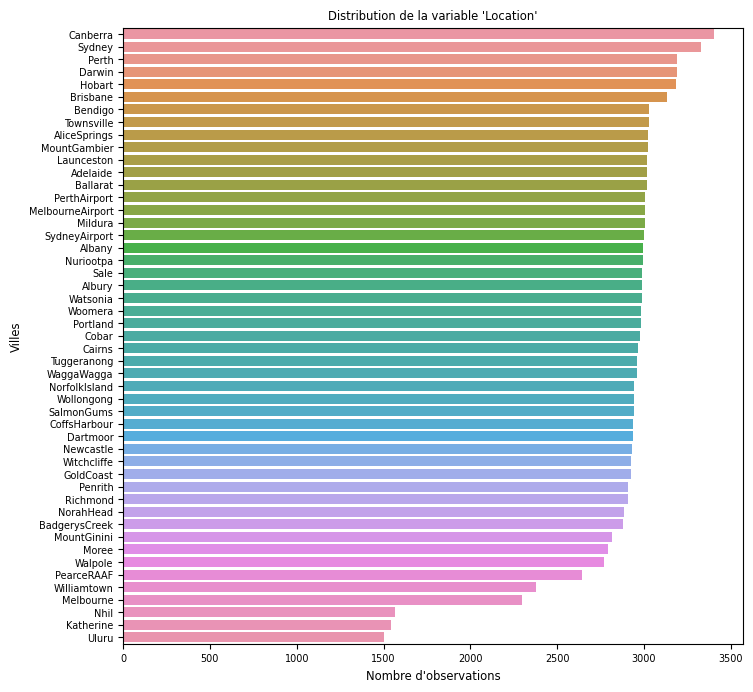

In [4]:
# distribution de la variable 'Location'
plt.figure(figsize=(8,8))
ax = sns.countplot(y=df['Location'], order=df['Location'].value_counts().index)
ax.set_title("Distribution de la variable 'Location'", fontsize="small")
ax.set_ylabel('Villes', fontsize="small")
ax.set_xlabel("Nombre d'observations", fontsize="small")
ax.tick_params(labelsize=7);

In [5]:
# récupération de la ville possédant le plus d'observations
city_with_max_obs = df['Location'].value_counts().sort_values(ascending=False).idxmax()
print("Ville possédant le plus d'observations : ", city_with_max_obs)

Ville possédant le plus d'observations :  Canberra


In [6]:
# filtrage du DataFrame selon la ville sélectionnée
df_city = df[df["Location"] == city_with_max_obs]

In [7]:
# étude statistique descriptive rapide pour la ville sélectionnée
df_city.describe()

,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Cloud3pm,Temp3pm,RainTomorrow,Temp_Delta_MinMax,Humidity_Delta
count,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000
mean,0.396767,6.937738,40.123457,45.840976,1018.784965,4.759522,19.488536,0.183715,14.129424,-27.282334
std,0.743219,3.270229,13.066391,18.100352,7.379713,2.397162,6.897487,0.387309,5.024148,16.000244
min,0.000000,0.000000,11.000000,4.000000,998.650000,0.000000,3.700000,0.000000,1.400000,-63.500000
25%,0.000000,4.940000,31.000000,34.000000,1013.700000,3.000000,13.800000,0.000000,10.400000,-39.000000
50%,0.000000,7.630540,39.000000,44.000000,1018.700000,4.499250,18.850000,0.000000,14.400000,-28.000000
75%,0.200000,9.215000,48.000000,56.000000,1023.800000,7.000000,24.500000,0.000000,17.900000,-17.000000
max,2.000000,13.600000,73.500000,99.000000,1036.650000,8.000000,39.500000,1.000000,25.450000,28.500000


In [8]:
# étude statistique descriptive rapide pour la ville sélectionnée
df_city.describe(include=[object])

,Location
count,3402
unique,1
top,Canberra
freq,3402


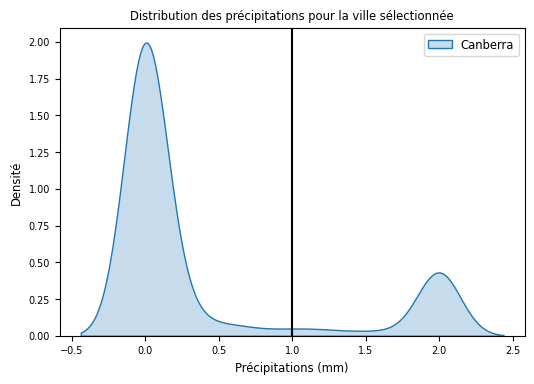

In [9]:
# distribution des précipitations pour la ville sélectionnée
plt.figure(figsize=(6,4))
ax = sns.kdeplot(df_city['Rainfall'], shade='True', label=city_with_max_obs)
ax.set_title("Distribution des précipitations pour la ville sélectionnée", fontsize="small")
ax.set_ylabel('Densité', fontsize="small")
ax.set_xlabel("Précipitations (mm)", fontsize="small")
plt.axvline(x=1, color='black')
ax.legend(fontsize="small")
ax.tick_params(labelsize=7);

In [10]:
# remplacement de l'index du DataFrame par conversion de la variable "Date" au format datetime
df_city['Date'] = pd.to_datetime(df_city['Date'])
df_city['month'] = pd.to_datetime(df_city['Date']).dt.month
df_city['year'] = pd.to_datetime(df_city['Date']).dt.year
df_city.set_index(['Date'], inplace=True)

In [11]:
# aperçu du DataFrame
df_city.head()

,Location,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Cloud3pm,Temp3pm,RainTomorrow,Temp_Delta_MinMax,Humidity_Delta,month,year
Date,,,,,,,,,,,,,
2007-11-01,Canberra,0.0,6.3,30.0,29.0,1019.7,7.0,23.6,1,16.3,-39.0,11,2007
2007-11-02,Canberra,2.0,9.7,39.0,36.0,1012.4,3.0,25.7,1,12.9,-44.0,11,2007
2007-11-03,Canberra,2.0,3.3,73.5,69.0,1009.5,7.0,20.2,1,9.7,-13.0,11,2007
2007-11-04,Canberra,2.0,9.1,54.0,56.0,1005.5,7.0,14.1,1,2.2,-6.0,11,2007
2007-11-05,Canberra,2.0,10.6,50.0,49.0,1018.3,7.0,15.4,0,8.5,-19.0,11,2007


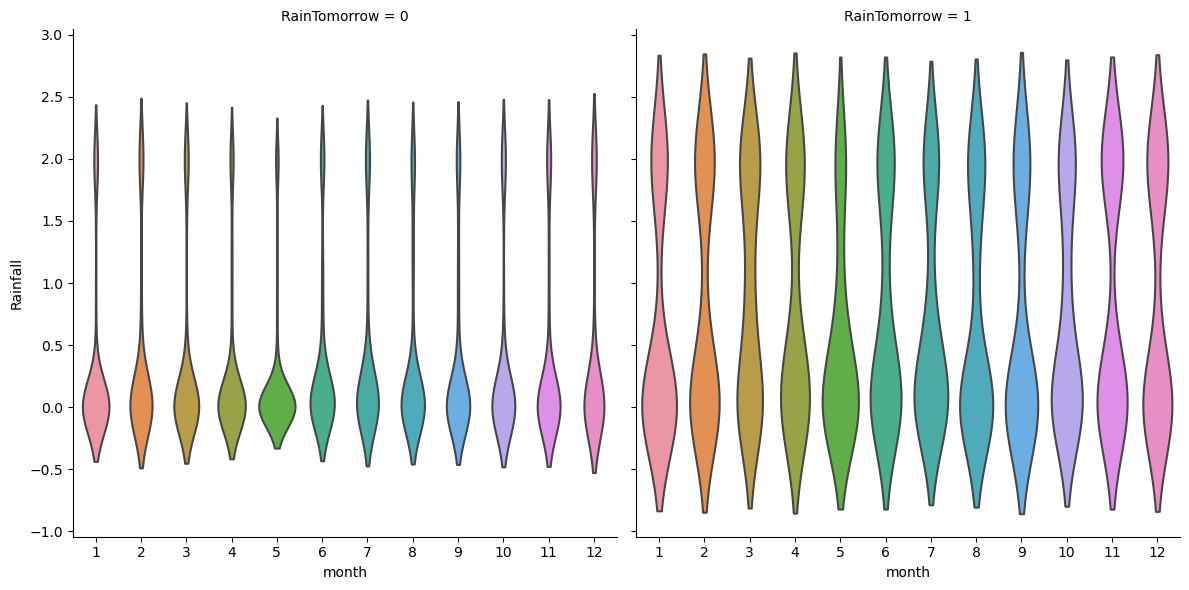

In [12]:
# distribution des précipitations avec les courbes de densité pour chaque modalité de la variable "Clim_type" 
# et pour chaque mois de la période observée
sns.catplot(kind='violin', x='month', y='Rainfall', data=df_city, col='RainTomorrow', inner=None, height=6, col_wrap=2);

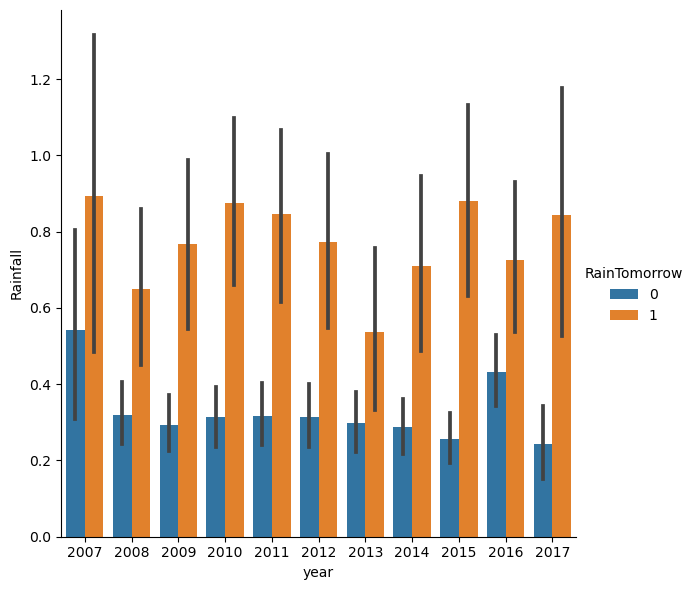

In [13]:
# graphique en barres des précipitations selon les modalités de la variable "Clim_type"
sns.catplot(x='year', y='Rainfall', kind='bar', height=6, hue='RainTomorrow', data=df_city);

In [14]:
# affichage de l'index
print(df_city.index)

DatetimeIndex(['2007-11-01', '2007-11-02', '2007-11-03', '2007-11-04',
               '2007-11-05', '2007-11-06', '2007-11-07', '2007-11-08',
               '2007-11-09', '2007-11-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3402, freq=None)


- La série temporelle filtrée contient des observations journalières pour la période du **1er Novembre 2007** au **25 Juin 2017**.

In [15]:
# répartition du nombre de jours d'observations pour chaque année
df_city['year'].value_counts().sort_values(ascending=True)

2007     61
2017    172
2011    319
2012    333
2013    337
2015    358
2014    361
2010    364
2009    365
2008    366
2016    366
Name: year, dtype: int64

In [16]:
# répartition du nombre de jours d'observations pour chaque année selon les valeurs de "RainTomorrow"
pd.crosstab(df_city.year, df_city.RainTomorrow).sort_values(by='year', ascending=True)

RainTomorrow,0,1
year,,
2007,42,19
2008,303,63
2009,301,64
2010,292,72
2011,260,59
2012,272,61
2013,284,53
2014,299,62
2015,296,62


In [17]:
# sélection des données de précipitation pour la ville sélectionnée
df_rain = df_city.Rainfall

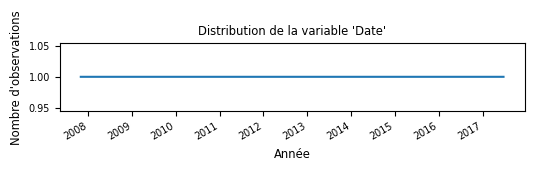

In [18]:
# affichage de la distribution de la variable 'Date'
plt.figure(figsize=(6,1))
df_rain.groupby(['Date']).size().plot()
plt.title("Distribution de la variable 'Date'", fontsize="small")
plt.xlabel("Année", fontsize="small")
plt.ylabel("Nombre d'observations", fontsize="small")
plt.tick_params(labelsize=7);

- la série temporelle filtrée couvre bien toute la période considérée.

In [19]:
# calcul de la moyenne mobile centrée sur une année
df_rain_ma_week = df_rain.rolling(window='7D', center=True).mean()

In [20]:
# calcul de la moyenne mobile centrée sur une année
df_rain_ma_month = df_rain.rolling(window='30D', center=True).mean()

In [21]:
# calcul de la moyenne mobile centrée sur une année
df_rain_ma_year = df_rain.rolling(window='365D', center=True).mean()

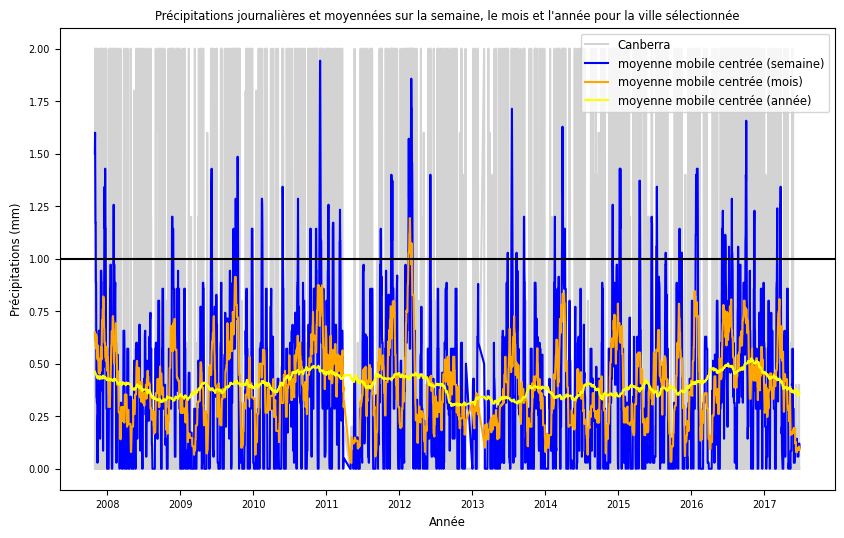

In [22]:
# affichage de la série temporelle originale et des moyenne mobiles centrées
plt.figure(figsize=(10,6))
plt.plot(df_rain, color='lightgray', label=city_with_max_obs)
plt.plot(df_rain_ma_week, color='blue', label='moyenne mobile centrée (semaine)')
plt.plot(df_rain_ma_month, color='orange', label='moyenne mobile centrée (mois)')
plt.plot(df_rain_ma_year, color='yellow', label='moyenne mobile centrée (année)')
plt.xlabel("Année", fontsize="small")
plt.ylabel("Précipitations (mm)", fontsize="small")
plt.axhline(y=1, color='black')
plt.legend(loc='upper right', fontsize="small")
plt.title("Précipitations journalières et moyennées sur la semaine, le mois et l'année pour la ville sélectionnée", 
          fontsize="small")
plt.tick_params(labelsize=7);

- la moyenne mobile centrée sur une année permet d'identifier la tendance de la série originale qui est relativement constante au cours du temps.

In [23]:
# détection des valeurs manquantes dans la série obtenue par moyenne mobile centrée sur une semaine
df_rain_ma_week.isna().sum()

0

In [24]:
# détection des valeurs manquantes dans la série obtenue par moyenne mobile centrée sur un mois
df_rain_ma_month.isna().sum()

0

In [25]:
# détection des valeurs manquantes dans la série obtenue par moyenne mobile centrée sur une année
df_rain_ma_year.isna().sum()

0

In [26]:
# différence entre la série originale et la moyenne mobile centrée sur une année
df_rain_wo_ma = df_rain - df_rain_ma_year

In [27]:
# conversion de la série "df_rain_wo_ma" en DataFrame
df = df_rain_wo_ma.to_frame()

In [28]:
# taille du DataFrame "df"
df.shape

(3402, 1)

In [29]:
# ajout de la colonne "month" au DataFrame "df_rain_wo_ma"
df["month"] = (df.index).month
df.head()

,Rainfall,month
Date,,
2007-11-01,-0.462295,11
2007-11-02,1.540217,11
2007-11-03,1.542703,11
2007-11-04,1.545161,11
2007-11-05,1.547594,11


In [30]:
# calcul de la moyenne par mois de "df_rain_wo_ma"
seasonality = df.groupby("month").mean()
seasonality

,Rainfall
month,
1,-0.056120
2,0.043235
3,0.014652
4,-0.039769
5,-0.190258
6,0.008653
7,0.035792
8,0.023770
9,0.003214


In [31]:
# calcul du coefficient saisonnier centré par soustraction de moyenne générale de la série
seasonality = seasonality - seasonality.mean()

In [32]:
# remplacement des précipitations manquantes journalières par propagation de la dernière observation valide
df_rain = df_rain.resample('d').mean().ffill()

In [33]:
# ré-échantillonage des données de la série temporelle sur une base mensuelle moyennée
df_rain_month = df_rain.resample('M').mean()

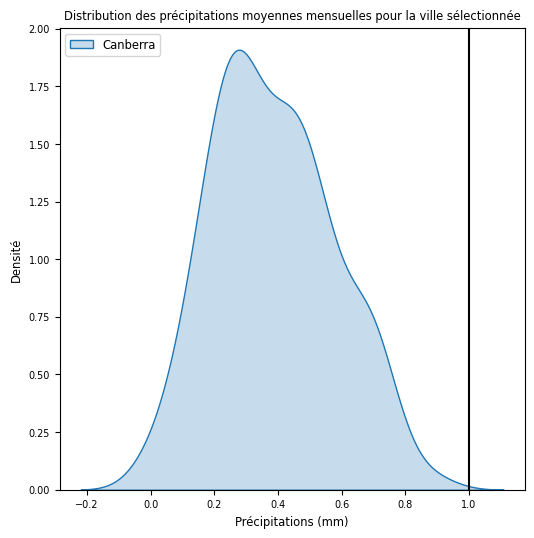

In [34]:
# distribution des précipitations moyennes mensuelles pour la ville sélectionnée sur la période d'observation
plt.figure(figsize=(6,6))
sns.kdeplot(df_rain_month, shade='True', label=city_with_max_obs)
plt.xlabel("Précipitations (mm)", fontsize="small")
plt.ylabel("Densité", fontsize="small")
plt.axvline(x=1, color='black')
plt.title("Distribution des précipitations moyennes mensuelles pour la ville sélectionnée", fontsize="small")
plt.legend(fontsize="small")
plt.tick_params(labelsize=7);

In [35]:
# taille du DataFrame
df_rain_month.shape

(116,)

In [36]:
# index du DataFrame
df_rain_month.index

DatetimeIndex(['2007-11-30', '2007-12-31', '2008-01-31', '2008-02-29',
               '2008-03-31', '2008-04-30', '2008-05-31', '2008-06-30',
               '2008-07-31', '2008-08-31',
               ...
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30'],
              dtype='datetime64[ns]', name='Date', length=116, freq='M')

In [37]:
# ajout de la colonne "year" au DataFrame
df_rain_month = df_rain_month.to_frame()
df_rain_month['year'] = (df_rain_month.index).year
df_rain_month.head()

,Rainfall,year
Date,,
2007-11-30,0.520000,2007
2007-12-31,0.780645,2007
2008-01-31,0.348387,2008
2008-02-29,0.648276,2008
2008-03-31,0.219355,2008


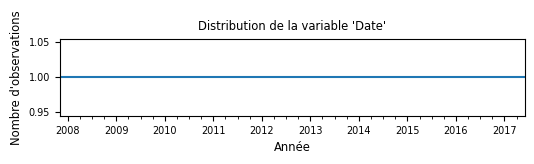

In [38]:
# affichage de la distribution de la variable 'Date'
plt.figure(figsize=(6,1))
df_rain_month.groupby(['Date']).size().plot()
plt.title("Distribution de la variable 'Date'", fontsize="small")
plt.xlabel("Année", fontsize="small")
plt.ylabel("Nombre d'observations", fontsize="small")
plt.tick_params(labelsize=7);

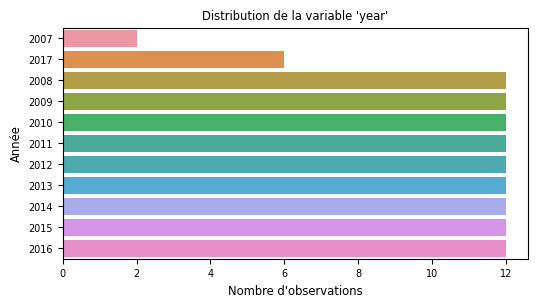

In [39]:
# affichage de la répartition du jeu de données selon les années 
plt.figure(figsize=(6,3))
ax = sns.countplot(y=df_rain_month['year'], order=df_rain_month['year'].value_counts().sort_values(ascending=True).index)
ax.set_title("Distribution de la variable 'year'", fontsize="small")
ax.set_ylabel('Année', fontsize="small")
ax.set_xlabel("Nombre d'observations", fontsize="small")
ax.tick_params(labelsize=7);

In [40]:
# sélection de 9 années entières uniquement
df_rain_month = df_rain_month.loc[pd.to_datetime('2008-01-31'):pd.to_datetime('2016-12-31')]

In [41]:
# index du DataFrame
df_rain_month.index

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31',
               ...
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=108, freq='M')

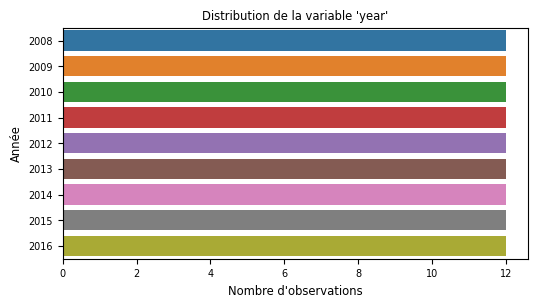

In [42]:
# affichage de la répartition du jeu de données selon les années 
plt.figure(figsize=(6,3))
ax = sns.countplot(y=df_rain_month['year'], order=df_rain_month['year'].value_counts().index);
ax.set_title("Distribution de la variable 'year'", fontsize="small")
ax.set_ylabel('Année', fontsize="small")
ax.set_xlabel("Nombre d'observations", fontsize="small")
ax.tick_params(labelsize=7);

In [43]:
# suppression de la colonne "year" au DataFrame "df_rain_month"
df_rain_month.drop('year', axis=1, inplace=True)

In [44]:
# aperçu du DataFrame "df_rain_month"
df_rain_month.head()

,Rainfall
Date,
2008-01-31,0.348387
2008-02-29,0.648276
2008-03-31,0.219355
2008-04-30,0.280000
2008-05-31,0.251613


In [45]:
# taille du DataFrame "df_rain_month"
df_rain_month.shape

(108, 1)

In [46]:
# taille du DataFrame "seasonality"
seasonality.shape

(12, 1)

In [47]:
# soustraction des coefficients saisonniers à la série pour obtenir une série corrigée de ses variations saisonnières
seasonal_vector = np.zeros(108)

j=0
for i in range(9):
    seasonal_vector[j:j+12] = seasonality.iloc[:,0]
    j+=12

df_rain_cvs = df_rain_month['Rainfall'] - seasonal_vector

In [48]:
# affichage de l'index
print(df_rain_cvs.index)

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31',
               ...
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=108, freq='M')


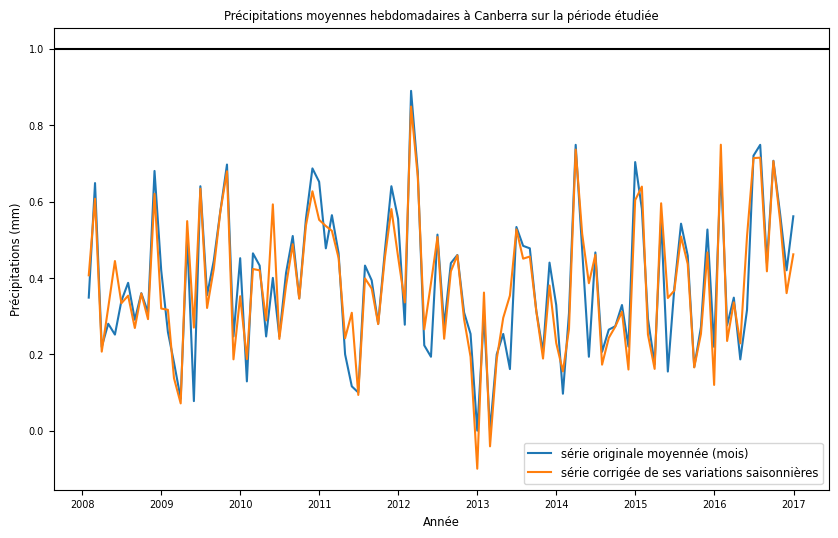

In [49]:
# affichage de la série temporelle originale moyennée sur une période d'un mois 
# et de la série corrigée de ses variations saisonnières
plt.figure(figsize=(10,6))
plt.plot(df_rain_month, label='série originale moyennée (mois)')
plt.plot(df_rain_cvs, label='série corrigée de ses variations saisonnières')
plt.xlabel("Année", fontsize="small")
plt.ylabel("Précipitations (mm)", fontsize="small")
plt.axhline(y=1, color='black')
plt.legend(loc='lower right', fontsize="small")
plt.title("Précipitations moyennes hebdomadaires à Canberra sur la période étudiée", fontsize="small")
plt.tick_params(labelsize=7);

In [50]:
# ré-échantillonage de la série temporelle originale moyennée sur une période d'une semaine
df_rain_week = df_rain.resample('W').mean()

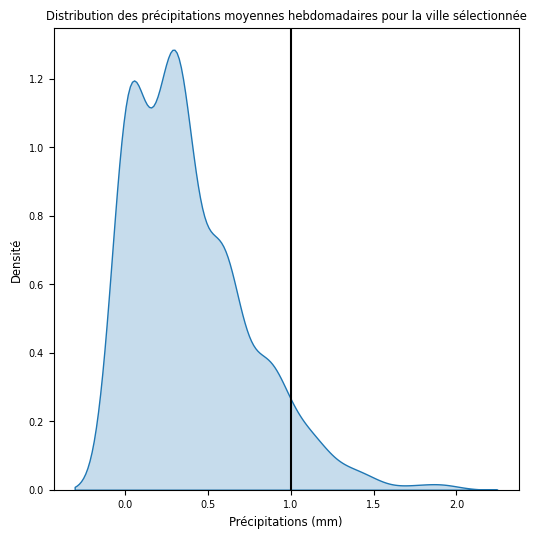

In [51]:
# distribution des précipitations moyennes hebdomadaires pour la ville sélectionnée sur la période d'observation
plt.figure(figsize=(6,6))
sns.kdeplot(df_rain_week, shade='True')
plt.xlabel("Précipitations (mm)", fontsize="small")
plt.ylabel("Densité", fontsize="small")
plt.axvline(x=1, color='black')
plt.title("Distribution des précipitations moyennes hebdomadaires pour la ville sélectionnée", fontsize="small")
plt.tick_params(labelsize=7);

## Décomposition automatique de la série temporelle

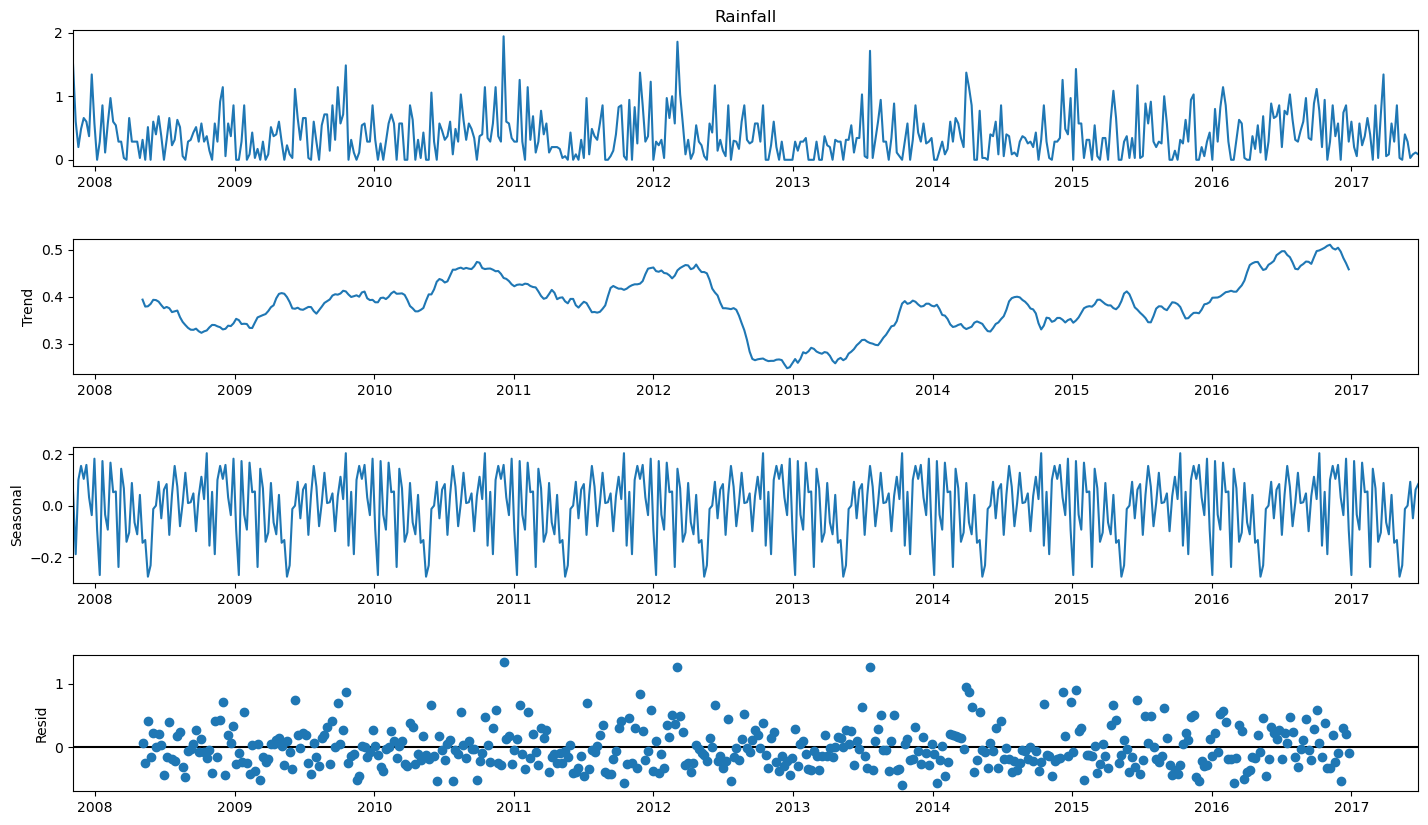

In [52]:
# décomposition automatique de la série temporelle identifiant la tendance, la saisonalité et le résidu
res = seasonal_decompose(df_rain_week, period=52, model='additive')
fig = res.plot()
fig.set_size_inches((16, 9));

- La tendance met en évidence les années de faibles et fortes précipitations,
- La saisonalité conserve une ampleur constante au cours du temps et correspond à un phénomène de période annuelle (soit 52 semaines environ),
- Le résidu ne présente pas de grandes variations en fonction du temps, il peut être assimilé à une suite de variables aléatoires non corrélées et de variance finie, c'est à dire à un bruit blanc faible.

In [53]:
# soustraction des coefficients saisonniers à la série originale
x_cvs = df_rain_week - res.seasonal

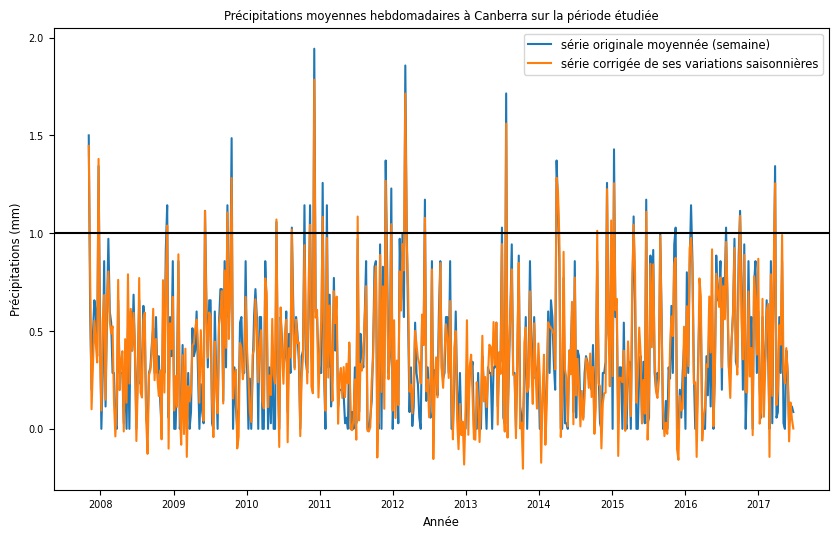

In [54]:
# affichage de la série temporelle originale moyennée sur une période d'une semaine
# et de la série corrigée de ses variations saisonnières
plt.figure(figsize=(10,6))
plt.plot(df_rain_week, label='série originale moyennée (semaine)')
plt.plot(x_cvs, label='série corrigée de ses variations saisonnières')
plt.xlabel("Année", fontsize="small")
plt.ylabel("Précipitations (mm)", fontsize="small")
plt.axhline(y=1, color='black')
plt.legend(loc='upper right', fontsize="small")
plt.title("Précipitations moyennes hebdomadaires à Canberra sur la période étudiée", fontsize="small")
plt.tick_params(labelsize=7);

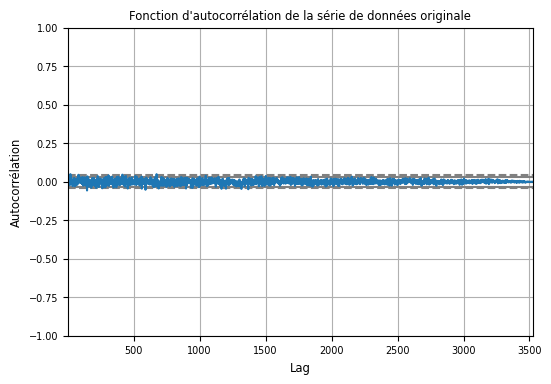

In [55]:
# fonction d'autocorrélation de la série de données originale
plt.figure(figsize=(6,4))
ax = pd.plotting.autocorrelation_plot(df_rain)
ax.set_title("Fonction d'autocorrélation de la série de données originale", fontsize="small")
ax.set_ylabel('Autocorrélation', fontsize="small")
ax.set_xlabel("Lag", fontsize="small")
ax.tick_params(labelsize=7);

- l'autocorrélation tend vers 0 mais la décroissance de la fonction d'autocorrélation est relativement lente

In [56]:
# différentiation d'ordre 1 sur la série temporelle originale afin de voir si cela permet de la stationnariser
df_rain_1 = df_rain.diff().dropna()

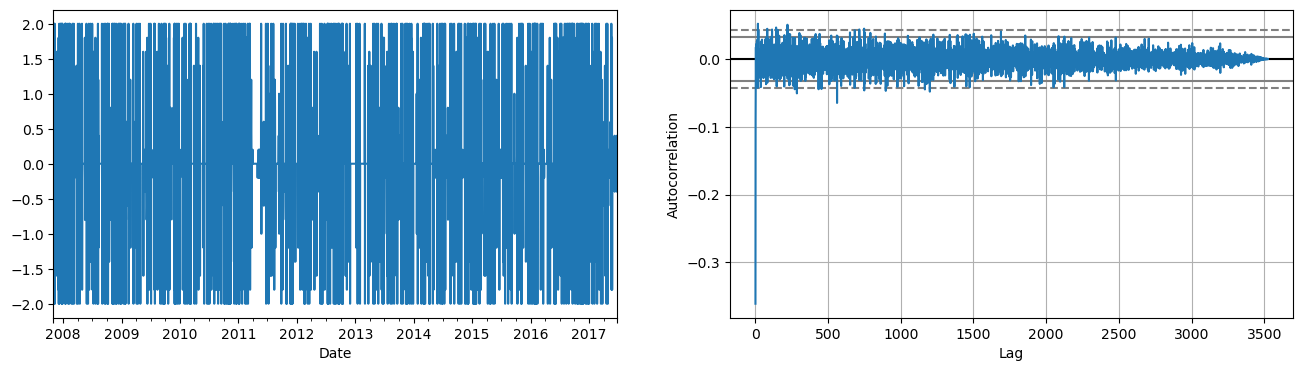

In [57]:
# affichage de la série temporelle différenciée et de sa fonction d'autocorrélation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
df_rain_1.plot(ax=ax1)
pd.plotting.autocorrelation_plot(df_rain_1, ax=ax2);

- l'autocorrélation simple tend vers 0 mais la série n'est pas stationnaire car la saisonalité empêche encore une décroissance rapide vers 0.

In [58]:
# test augmenté de Dickey-Fuller à la série différenciée
_, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(df_rain_1)
p_value

2.0711479219498942e-30

- la p_value est inférieure à 5% donc nous pouvons rejeter l'hypothèse que la série n'est pas stationnaire et donc la considérer comme stationnaire.

In [59]:
# différentiation en saisonalité sur "df_rain_1"
df_rain_2 = df_rain_1.diff(periods=365).dropna()

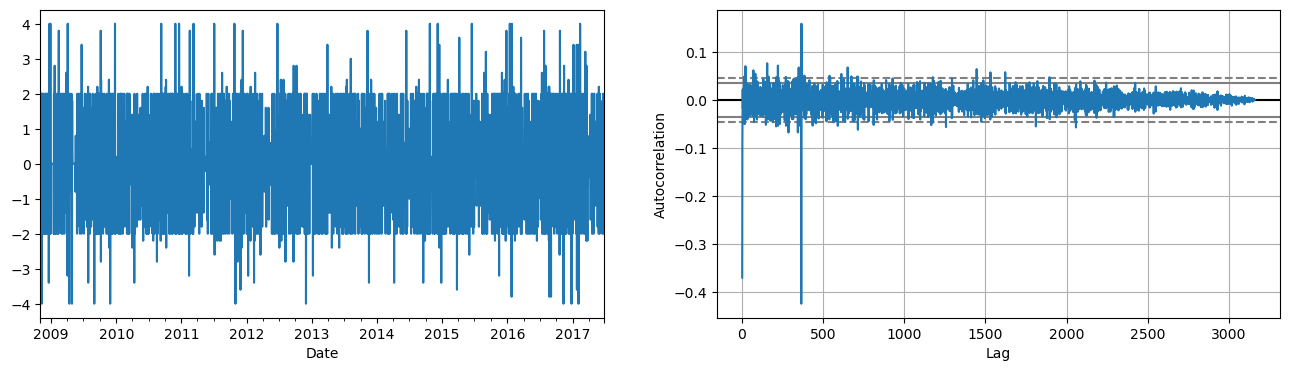

In [60]:
# affichage de la série temporelle doublement différenciée et de sa fonction d'autocorrélation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
df_rain_2.plot(ax=ax1)
pd.plotting.autocorrelation_plot(df_rain_2, ax=ax2);

- les valeurs ne décroissent pas suffisamment rapidement pour que l'on puisse considérer la série comme stationnaire.
- la série doublement différenciée ne semble plus présenter de tendance ni de saisonalité.

In [61]:
# test augmenté de Dickey-Fuller à la série doublement différenciée
_, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(df_rain_2)
p_value

3.175997507793277e-30

- la p_value est inférieure à 5% donc nous pouvons rejeter l'hypothèse que la série n'est pas stationnaire et donc la considérer comme stationnaire.

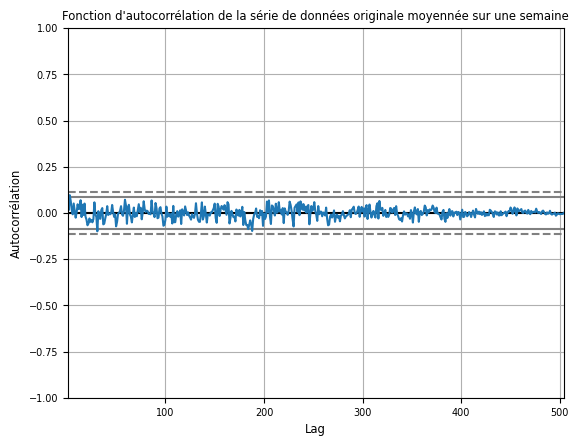

In [62]:
# fonction d'autocorrélation de la série de données originale moyennée sur une semaine
ax = pd.plotting.autocorrelation_plot(df_rain_week)
ax.set_title("Fonction d'autocorrélation de la série de données originale moyennée sur une semaine", fontsize="small")
ax.set_ylabel('Autocorrélation', fontsize="small")
ax.set_xlabel("Lag", fontsize="small")
ax.tick_params(labelsize=7);

In [63]:
# différentiation d'ordre 1 sur la série temporelle originale afin de voir si cela permet de la stationnariser
df_rain_week_1 = df_rain_week.diff().dropna()

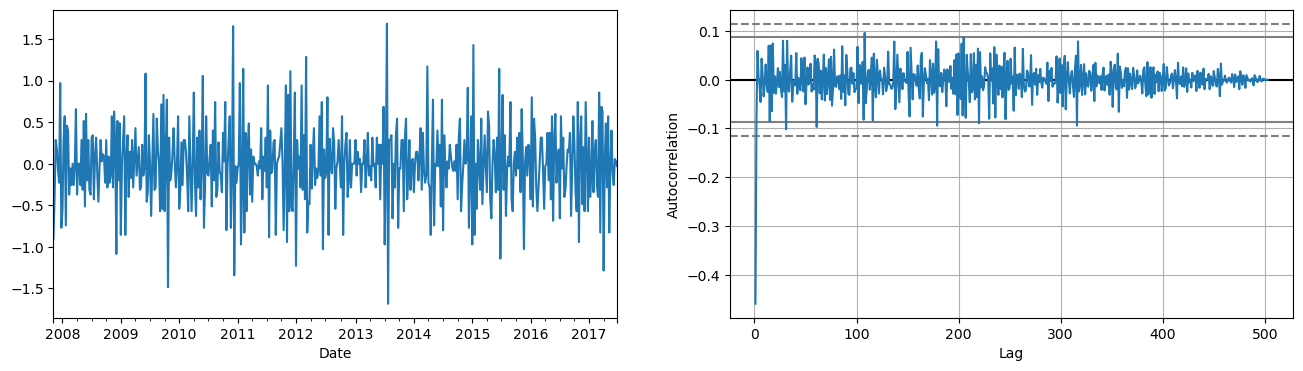

In [64]:
# affichage de la série temporelle différenciée et de sa fonction d'autocorrélation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
df_rain_week_1.plot(ax=ax1)
pd.plotting.autocorrelation_plot(df_rain_week_1, ax=ax2);

- l'autocorrélation simple tend vers 0 mais la série n'est pas stationnaire car la saisonalité empêche encore une décroissance rapide vers 0.

In [65]:
# test augmenté de Dickey-Fuller à la série différenciée
_, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(df_rain_week_1)
p_value

5.88787767059468e-15

- la p_value est inférieure à 5% donc nous pouvons rejeter l'hypothèse que la série n'est pas stationnaire et donc la considérer comme stationnaire.

In [66]:
# différentiation en saisonalité sur "df_rain_1"
df_rain_week_2 = df_rain_week_1.diff(periods=52).dropna()

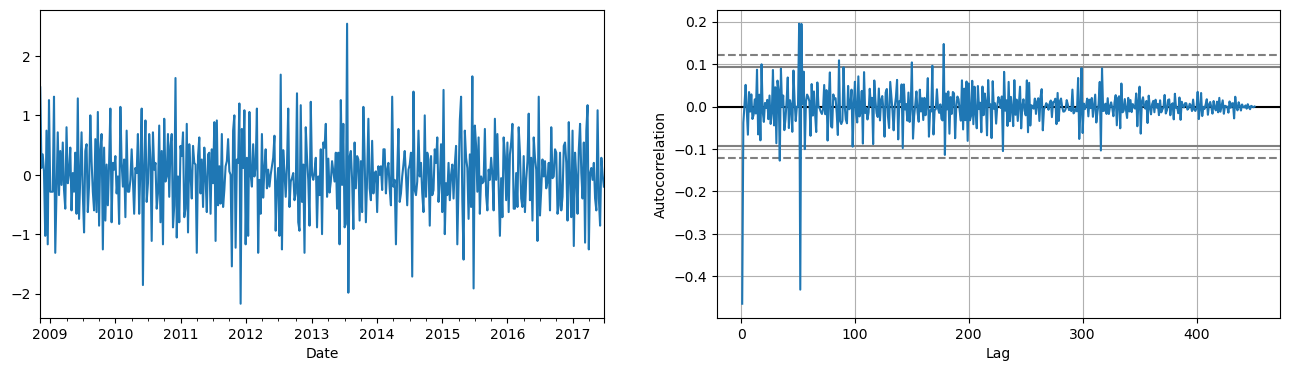

In [67]:
# affichage de la série temporelle doublement différenciée et de sa fonction d'autocorrélation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
df_rain_week_2.plot(ax=ax1)
pd.plotting.autocorrelation_plot(df_rain_week_2, ax=ax2);

- les valeurs ne décroissent pas suffisamment rapidement pour que l'on puisse considérer la série comme stationnaire.
- la série doublement différenciée ne semble plus présenter de tendance ni de saisonalité.

In [68]:
# test augmenté de Dickey-Fuller à la série doublement différenciée
_, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(df_rain_week_2)
p_value

4.3654630207002623e-20

- la p_value est inférieure à 5% donc nous pouvons rejeter l'hypothèse que la série n'est pas stationnaire et donc la considérer comme stationnaire.

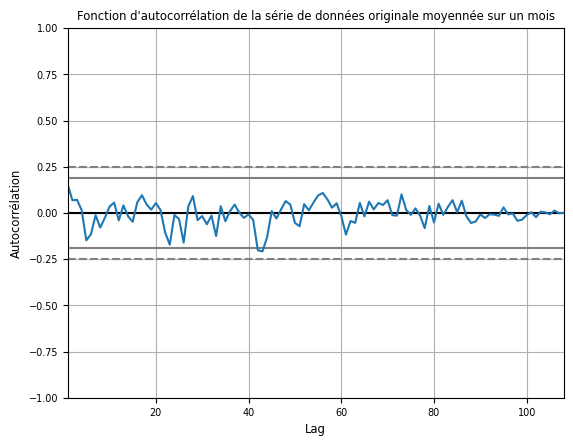

In [69]:
# fonction d'autocorrélation de la série de données originale moyennée sur un mois
ax = pd.plotting.autocorrelation_plot(df_rain_month)
ax.set_title("Fonction d'autocorrélation de la série de données originale moyennée sur un mois", fontsize="small")
ax.set_ylabel('Autocorrélation', fontsize="small")
ax.set_xlabel("Lag", fontsize="small")
ax.tick_params(labelsize=7);

In [70]:
# différentiation d'ordre 1 sur la série temporelle originale afin de voir si cela permet de la stationnariser
df_rain_month_1 = df_rain_month.diff().dropna()

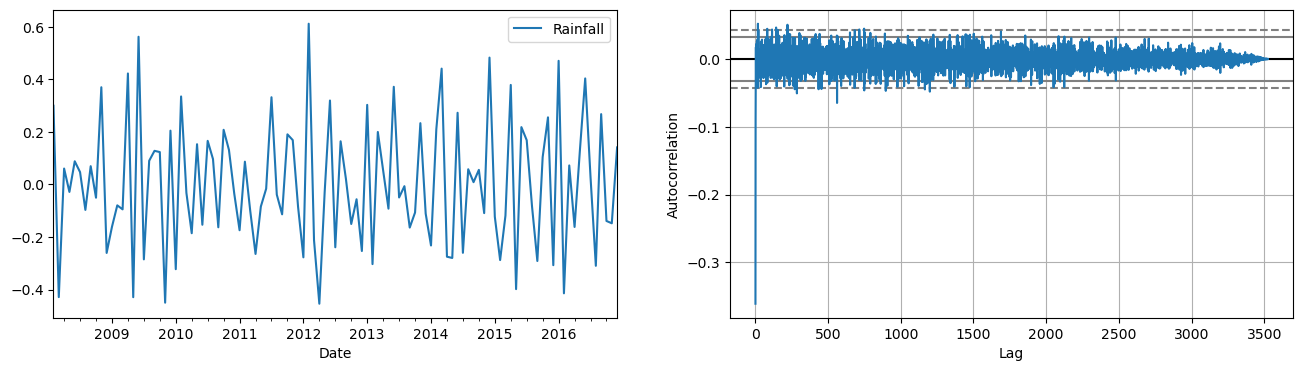

In [71]:
# affichage de la série temporelle différenciée et de sa fonction d'autocorrélation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
df_rain_month_1.plot(ax=ax1)
pd.plotting.autocorrelation_plot(df_rain_1, ax=ax2);

- l'autocorrélation simple tend vers 0 mais la série n'est pas stationnaire car la saisonalité empêche encore une décroissance rapide vers 0.

In [72]:
# test augmenté de Dickey-Fuller à la série différenciée
_, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(df_rain_month_1)
p_value

3.6718631375331593e-09

- la p_value est inférieure à 5% donc nous pouvons rejeter l'hypothèse que la série n'est pas stationnaire et donc la considérer comme stationnaire.

In [73]:
# différentiation en saisonalité sur "df_rain_1"
df_rain_month_2 = df_rain_month_1.diff(periods=12).dropna()

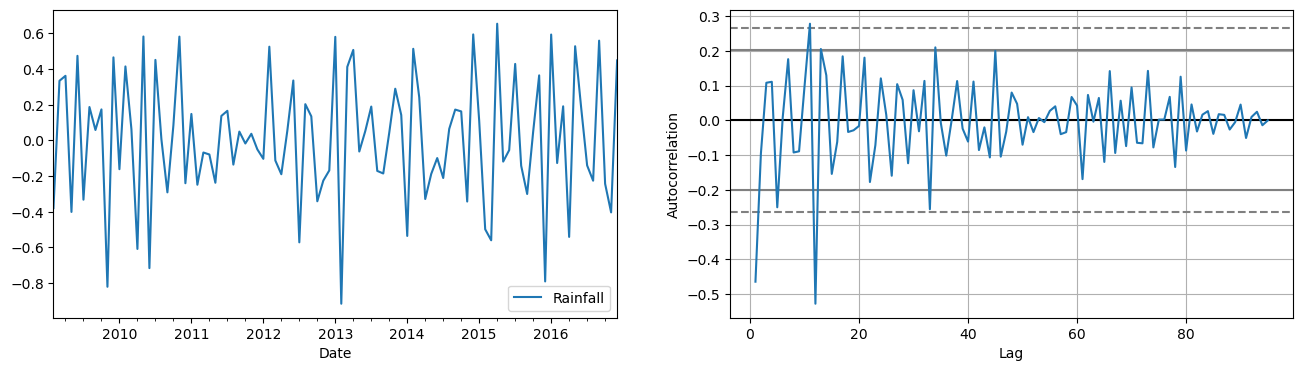

In [74]:
# affichage de la série temporelle doublement différenciée et de sa fonction d'autocorrélation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
df_rain_month_2.plot(ax=ax1)
pd.plotting.autocorrelation_plot(df_rain_month_2, ax=ax2);

- les valeurs ne décroissent pas suffisamment rapidement pour que l'on puisse considérer la série comme stationnaire.
- la série doublement différenciée ne semble plus présenter de tendance ni de saisonalité.

In [75]:
# test augmenté de Dickey-Fuller à la série doublement différenciée
_, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(df_rain_month_2)
p_value

0.0004974375940613467

- la p_value est inférieure à 5% donc nous pouvons rejeter l'hypothèse que la série n'est pas stationnaire et donc la considérer comme stationnaire.

## Définition d'un modèle SARIMA

In [76]:
# différentiation d'ordre 1 sur la série temporelle originale afin de voir si cela permet de la stationnariser
df_rain_1 = df_rain.diff().dropna()

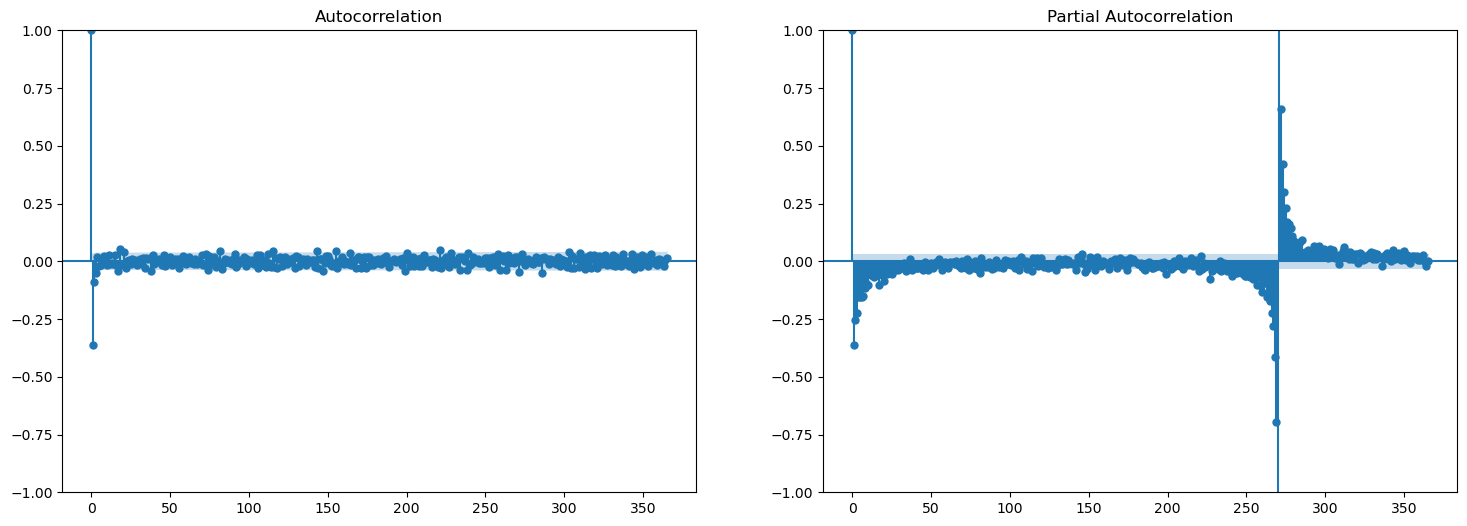

In [77]:
# affichage sur 365 décalages des autocorrélogrammes simple et partiel de la série différenciée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

plot_acf(df_rain_1, lags=365, ax=ax1)
plot_pacf(df_rain_1, lags=365, ax=ax2);

In [78]:
# différentiation en saisonalité sur "df_rain_1"
df_rain_2 = df_rain_1.diff(periods=365).dropna()

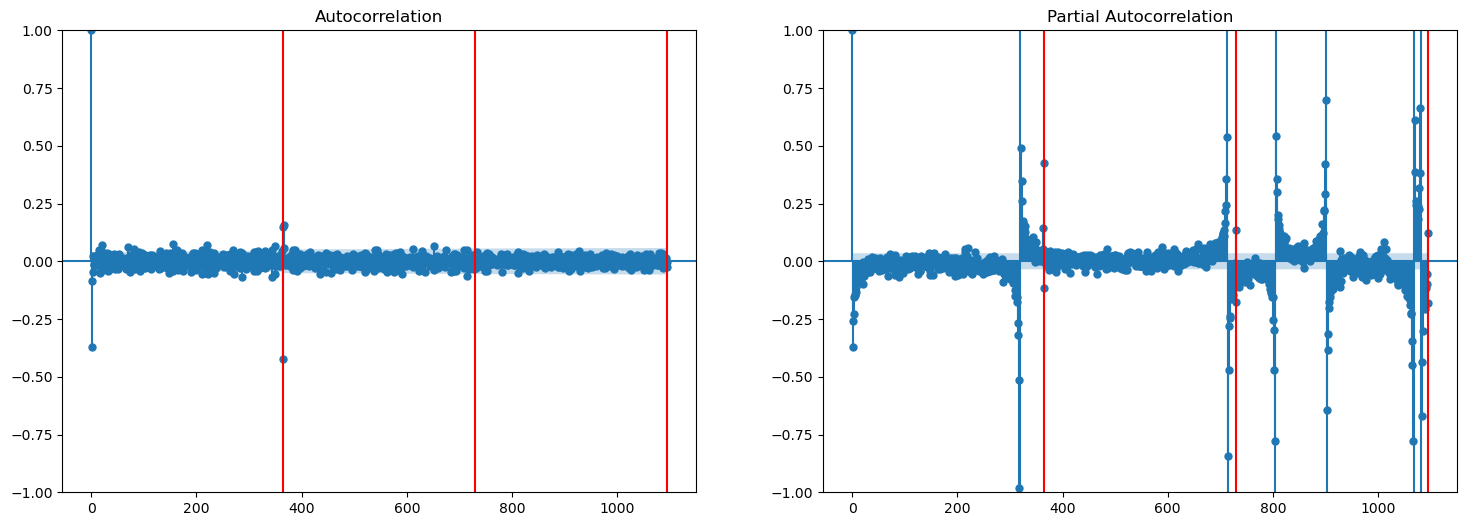

In [81]:
# affichage sur 365*3 décalages des autocorrélogrammes simple et partiel de la série doublement différenciée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

plot_acf(df_rain_2, lags=365*3, ax=ax1)
ax1.axvline(x=365, color='red')
ax1.axvline(x=365*2, color='red')
ax1.axvline(x=365*3, color='red')
plot_pacf(df_rain_2, lags=365*3, ax=ax2)
ax2.axvline(x=365, color='red')
ax2.axvline(x=365*2, color='red')
ax2.axvline(x=365*3, color='red');

- nous avons déjà identifié une saisonalité de période 365 $(k=365)$. De plus, nous avons fait une différentiation simple $(d=1)$ et une différentiation saisonnière $(D=1)$ pour stationnariser notre série temporelle. Ainsi notre modèle sera de la forme $SARIMA(p,1,q)(P,1,Q)_{365}$.
- on remarque qu'à la fois l'autocorrélation simple et partielle tendent vers 0, il ne semble pas y avoir de coupure en particulier. On peut donc supposer un processus $ARMA(p,q)$. Nous allons donc commencer par estimer via un processus $ARMA(1,1)$ la partie non saisonnière de notre série temporelle.
- pour l'autocorrélation simple, on observe une forte valeur au $365^{ème}$ pic tandis que les pics suivants sont extrêmement faibles. Ainsi la règle sur l'ACF pour un processus $MA(1)$ est respectée.  
- pour l'autocorrélation partielle, le $365^{ème}$ pic est encore significatif tandis que les $730^{ème}$, $1095^{ème}$ et $1460^{ème}$ pics sont dans la limite de non-significativité. Il n'y a pas de coupure mais plutôt une décroissance. Ainsi la règle sur la PACF pour un processus $MA(1)$ est aussi respectée.
- ainsi pour les ordres $p$, $q$, $P$ et $Q$ nous avons:
    - une décroissance de l'ACF et de la PACF sans coupure nette : modèle $ARMA(1,1)$.
    - pour les pics saisonniers, une coupure de l'ACF après la première période et une décroissance de la PACF : modèle $MA(1)$.

Nous allons donc entraîner un modèle $SARIMA(1,1,1)(0,1,1)_{365}$

In [82]:
# instantiation d'un modèle SARIMAX correspondant au modèle SARIMA(1,1,1)(0,0,0)_365
model = sm.tsa.SARIMAX(df_rain, order=(1,1,1), seasonal_order=(0,0,0,365))
sarima = model.fit()
print(sarima.summary())

                               SARIMAX Results                                
Dep. Variable:               Rainfall   No. Observations:                 3525
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3783.095
Date:                Sat, 12 Nov 2022   AIC                           7572.190
Time:                        06:14:14   BIC                           7590.692
Sample:                    11-01-2007   HQIC                          7578.791
                         - 06-25-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2726      0.014     19.757      0.000       0.246       0.300
ma.L1         -1.0000      0.021    -47.845      0.000      -1.041      -0.959
sigma2         0.5001      0.018     28.375      0.0

L'utilisation d'un modèle **SARIMAX** pose problème et nous empêche de conclure l'étude avec les 2 dernières cellules d'exécution ci-dessous.

Pour contourner ce problème, nous allons nous intéresser à l'étude d'un modèle **ARIMA** (cf. prochaine section).

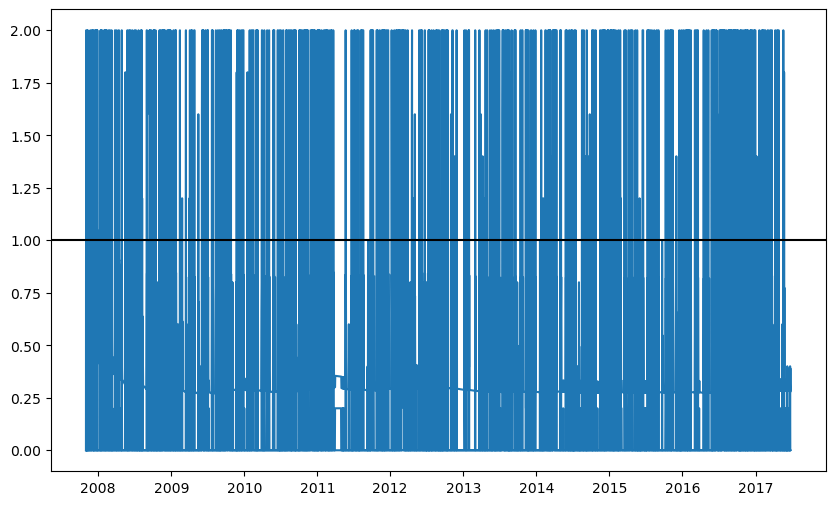

In [83]:
# affichage de la prédiction
pred = sarima.predict()
series_train_pred = pd.concat([df_rain, pred])
plt.figure(figsize=(10,6))
plt.plot(series_train_pred)
plt.axhline(y=1, color='black');

In [84]:
# prédiction du modèle avec intervalle de confiance
prediction = sarima.get_forecast(steps=365).summary_frame() 

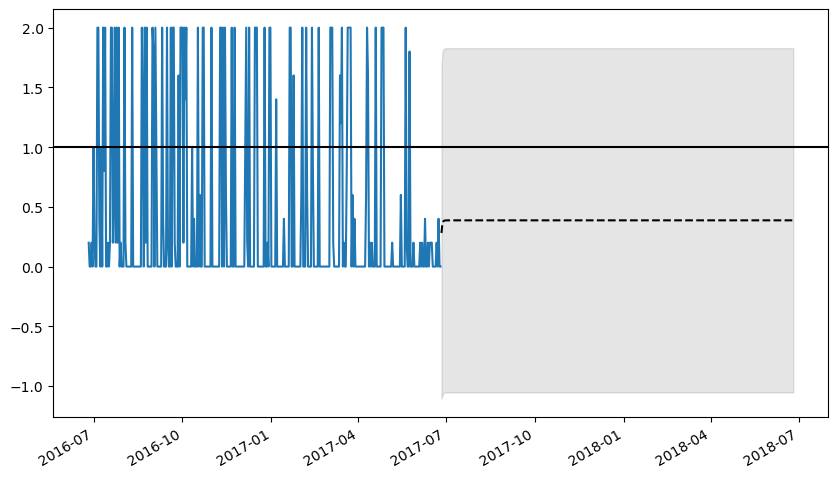

In [85]:
# visualisation de la moyenne et de l'intervalle de confiance pour la prévision des précipitations hors échantillon
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_rain.iloc[-365:])
prediction['mean'].plot(ax=ax, style='k--', figsize=(10,6)) 
ax.fill_between(prediction.index, prediction['mean_ci_lower'], prediction['mean_ci_upper'], color='k', alpha=0.1)
plt.axhline(y=1, color='black');

## Définition d'un modèle ARIMA

Les données ont une forte composante saisonnière annuelle. Nous pouvons rendre les données stationnaires en prenant la différence saisonnière. Autrement dit, nous pouvons prendre l'observation d'un jour et soustraire l'observation du même jour il y a un an. Cela se traduira par un ensemble de données stationnaire à partir duquel nous pourrons ajuster un modèle ARIMA simple.

In [86]:
# fonction de différentiation saisonnière
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

Cette opération peut s'inverser en ajoutant la valeur de l'observation il y a un an. Nous devrons le faire pour toutes les prévisions faites par un modèle formé sur les données désaisonnalisées.

In [87]:
# fonction d'inversion de la différentiation saisonnière
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [88]:
# application de la différence saisonnière
X = df_rain.values
days_in_year = 365
differenced = difference(X, days_in_year)

In [89]:
# ajustement du modèle ARIMA
model = ARIMA(differenced, order=(1,1,1))
arima = model.fit()

print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3160
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4435.368
Date:                Sat, 12 Nov 2022   AIC                           8876.737
Time:                        06:14:21   BIC                           8894.911
Sample:                             0   HQIC                          8883.257
                               - 3160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2745      0.015     17.734      0.000       0.244       0.305
ma.L1         -1.0000      0.059    -16.972      0.000      -1.115      -0.885
sigma2         0.9683      0.061     15.978      0.0

- la $4^{ème}$ colonne indique la p-valeur pour la significativité de chaque paramètre. Ici nous voyons que tous les paramètres ont une p-valeur nulle. Nous pouvons donc considérer tous les paramètres comme significatifs dans le modèle.
- selon le test de **"Ljung-Box"**, on lit sur la ligne **Prob(Q)** que la p-valeur de ce test est de **0.94**, donc on ne rejette pas l'hypothèse $H0$: "le résidu est un bruit blanc".
- selon le test de **"Jarque-Bera"**, on lit sur la ligne **Prob(JB)** que la p-valeur de ce test est **nulle**, donc on rejette l'hypothèse $H0$: "le résidu suit une distribution normale".
- le résidu vérifie les hypothèses que l'on a faite à priori. On peut donc conclure que le modèle $ARIMA(1,1,1)$ est satisfaisant. Nous allons maintenant utiliser ce modèle pour faire une prédiction à l'horizon d'une semaine sur les prévisions de pluie.

## Prévision hors échantillon en une étape: J+1

Les modèles **ARIMA** sont parfaits pour les prévisions en une étape.

Une prévision en une étape est une prévision de l'étape de temps suivante dans la séquence à partir des données disponibles utilisées pour ajuster le modèle.

Dans ce cas, nous sommes intéressés par une prévision en une étape du jour du **19 Juin 2017**.

### Utilisation de la fonction forecast()

Par défaut, la fonction **forecast()** d'un modèle **ARIMA** effectue une prévision hors échantillon en une seule étape. Le résultat de la fonction **forecast()** est un tableau contenant la valeur de la prévision, l'erreur standard de la prévision et les informations sur l'intervalle de confiance.

In [90]:
# prévision hors échantillon en une étape
forecast = arima.forecast()[0]

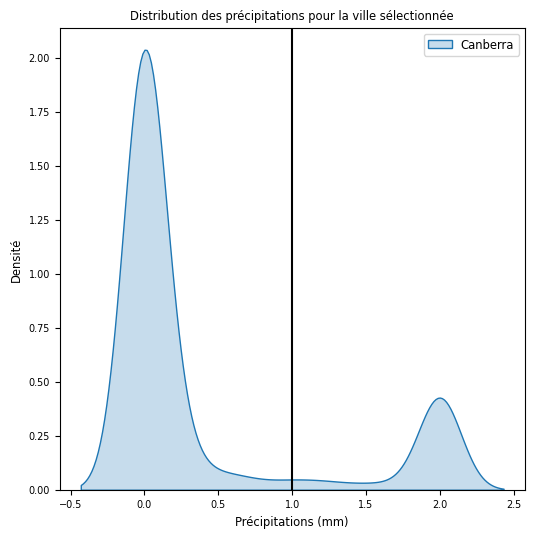

In [91]:
# distribution des précipitations pour la ville sélectionnée
plt.figure(figsize=(6,6))
sns.kdeplot(df_rain, shade='True', label=city_with_max_obs)
plt.xlabel("Précipitations (mm)", fontsize="small")
plt.ylabel("Densité", fontsize="small")
plt.axvline(x=1, color='black')
plt.title("Distribution des précipitations pour la ville sélectionnée", fontsize="small");
plt.legend(fontsize="small")
plt.tick_params(labelsize=7);

Nous pouvons désormais inverser la différence saisonnière et reconvertir la valeur dans l'échelle d'origine.

In [92]:
# inversion de la différentiation saisonnière
forecast = inverse_difference(X, forecast, days_in_year)
print('Rainfall [forecast]: %f mm' % forecast)

Rainfall [forecast]: -0.069932 mm


Rainfall < 1 mm, ce qui signifierait que "RainTomorrow = No" pour le 18 Juin 2017.

In [93]:
# aperçu du DataFrame d'origine
df_city.head()

,Location,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Cloud3pm,Temp3pm,RainTomorrow,Temp_Delta_MinMax,Humidity_Delta,month,year
Date,,,,,,,,,,,,,
2007-11-01,Canberra,0.0,6.3,30.0,29.0,1019.7,7.0,23.6,1,16.3,-39.0,11,2007
2007-11-02,Canberra,2.0,9.7,39.0,36.0,1012.4,3.0,25.7,1,12.9,-44.0,11,2007
2007-11-03,Canberra,2.0,3.3,73.5,69.0,1009.5,7.0,20.2,1,9.7,-13.0,11,2007
2007-11-04,Canberra,2.0,9.1,54.0,56.0,1005.5,7.0,14.1,1,2.2,-6.0,11,2007
2007-11-05,Canberra,2.0,10.6,50.0,49.0,1018.3,7.0,15.4,0,8.5,-19.0,11,2007


In [94]:
df_city.loc['2017-06-19', 'Rainfall']

0.0

In [95]:
df_city.loc['2017-06-18', "RainTomorrow"]

0

Les prévisions sont correctes à J+1 sur l'ensemble de test.

### Utilisation de la fonction predict()

La fonction **predict()** d'un modèle **ARIMA** peut être utilisée pour prédire des pas de temps arbitraires dans l'échantillon et hors de l'échantillon, y compris le prochain pas de temps de prévision hors de l'échantillon.

La fonction de prédiction nécessite de spécifier un début et une fin, il peut s'agir des index des pas de temps relatifs au début des données d'apprentissage utilisées pour ajuster le modèle.

In [96]:
# prévision hors échantillon en une étape
start_index = len(differenced)
end_index = len(differenced)

forecast = arima.predict(start=start_index, end=end_index)

In [97]:
# inversion de la différentiation saisonnière
forecast = inverse_difference(X, forecast, days_in_year)
print('Rainfall [forecast]: %f mm' % forecast)

Rainfall [forecast]: -0.069932 mm


Nous retrouvons le même résultat qu'avec la méthode **Forecast()**, à savoir: Rainfall < 1 mm, ce qui signifierait que "RainTomorrow = No" pour le 18 Juin 2017.

In [98]:
df_city.loc['2017-06-19', 'Rainfall']

0.0

In [99]:
df_city.loc[pd.to_datetime('2017-06-18'), "RainTomorrow"]

0

La fonction **predict()** présente l'avantage d'être plus flexible que la méthode **Forecast()**. Il est possible de spécifier n'importe quel point ou intervalle de prévision contigu à l'intérieur ou à l'extérieur de l'échantillon.

## Prévision hors échantillon à plusieurs étapes: J+3, J+7

Il est possible de faire des prévisions en plusieurs étapes en utilisant les fonctions **forecast()** et **predict()** vues précédemment. 

### Utilisation de la fonction forecast()

La fonction **forecast()** a un argument appelé "steps" qui permet de spécifier le nombre de pas de temps à prévoir.

Par défaut, cet argument est défini sur 1 pour une prévision hors échantillon en une étape. Ici nous le réglons sur 7 pour obtenir une prévision pour les 7 prochains jours.

Nous pouvons ensuite inverser chaque pas de temps prévu, un à la fois et imprimer les valeurs. Pour inverser la valeur de prévision pour t+2, nous avons besoin de la valeur de prévision inversée pour t+1. Ici, nous les ajoutons à la fin d'une liste appelée "history" à utiliser lors de l'appel **inverse_difference()**.

In [100]:
# fonction de différentiation saisonnière
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# fonction d'inversion de la différentiation saisonnière
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# application de la différence saisonnière
X = df_rain.values
days_in_year = 365
differenced = difference(X, days_in_year)

# ajustement du modèle ARIMA
model = ARIMA(differenced, order=(1,1,1))
arima = model.fit()

# prévision hors échantillon à plusieurs étapes
forecast = arima.forecast(steps=7)

# inversion de la différentiation saisonnière
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: -0.069932
Day 2: -0.069539
Day 3: -0.014535
Day 4: 0.200563
Day 5: 0.004707
Day 6: 1.005845
Day 7: 0.206157


- à J+3 : Rainfall > 1 mm, ce qui signifierait que "RainTomorrow = Yes" pour le 20 Juin 2017.
- à J+7 : Rainfall = 1 mm, ce qui signifierait que "RainTomorrow = Yes/No" pour le 24 Juin 2017.

In [101]:
df_city.loc[pd.to_datetime('2017-06-21'), 'Rainfall']

0.2

In [102]:
df_city.loc[pd.to_datetime('2017-06-20'), "RainTomorrow"]

0

In [103]:
df_city.loc[pd.to_datetime('2017-06-25'), "Rainfall"]

0.0

In [104]:
df_city.loc[pd.to_datetime('2017-06-24'), "RainTomorrow"]

0

### Utilisation de la fonction predict()

La fonction **predict()** peut également prévoir les 7 prochains pas de temps hors échantillon.

En utilisant des index de pas de temps, nous pouvons spécifier l'index de fin comme 6 pas de temps supplémentaires dans le futur.

In [105]:
# fonction de différentiation saisonnière
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# fonction d'inversion de la différentiation saisonnière
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# application de la différence saisonnière
X = df_rain.values
days_in_year = 365
differenced = difference(X, days_in_year)

# ajustement du modèle ARIMA
model = ARIMA(differenced, order=(1,1,1))
arima = model.fit()

# prévision hors échantillon à plusieurs étapes
start_index = len(differenced)
end_index = start_index + 6

forecast = arima.predict(start=start_index, end=end_index)

# inversion de la différentiation saisonnière
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: -0.069932
Day 2: -0.069539
Day 3: -0.014535
Day 4: 0.200563
Day 5: 0.004707
Day 6: 1.005845
Day 7: 0.206157


L'appel à la méthode **predict()** produit les mêmes résultats que l'appel de la fonction **forecast()** dans la section précédente, à savoir:
- à J+3 : Rainfall > 1 mm, ce qui signifierait que "RainTomorrow = Yes" pour le 20 Juin 2017.
- à J+7 : Rainfall = 1 mm, ce qui signifierait que "RainTomorrow = Yes/No" pour le 24 Juin 2017.

In [106]:
df_city.loc[pd.to_datetime('2017-06-21'), 'Rainfall']

0.2

In [107]:
df_city.loc[pd.to_datetime('2017-06-20'), "RainTomorrow"]

0

In [108]:
df_city.loc[pd.to_datetime('2017-06-25'), "Rainfall"]

0.0

In [109]:
df_city.loc[pd.to_datetime('2017-06-24'), "RainTomorrow"]

0

## Conclusion